In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='EleutherAI/gpt-j-6B'

In [3]:
results = {'acc':[],
           'f1':[],
           'lr':[]}

In [4]:
learning_rates = [1.0e-3, 1.0e-4, 1.0e-5, 1.0e-6]
for lr in learning_rates:
    print(f'Grid search {model_checkpoint}, learning rate {lr}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=10,labels=data.labels)
    trainer.model = model.model
    trainer.device = model.device
    acc, f1 = trainer.run(lr=lr,wd=0.0,train_dataloader=data.train_dataloader,eval_dataloader=data.eval_dataloader,test_dataloader=data.test_dataloader, early_stop=3)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['lr'].append(lr)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search EleutherAI/gpt-j-6B, learning rate 0.001


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/457 [00:00<?, ? examples/s]

OSError: [Errno 28] No space left on device

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

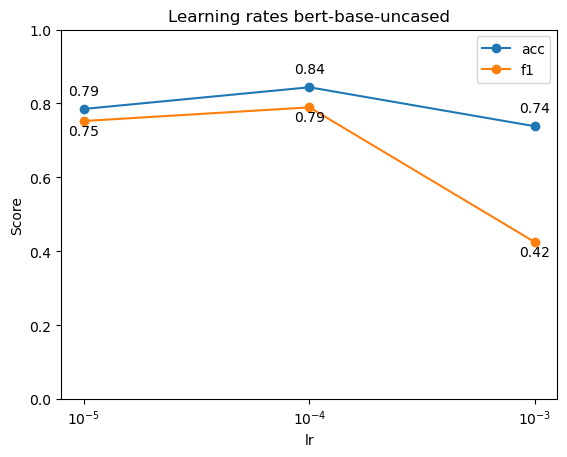

In [ ]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='lr', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["lr"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["lr"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['lr'], [f'{val:.0e}' for val in df['lr']], ha='center')
    plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('lr')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Learning rates {model_checkpoint}')